# Linear Transformation on Images in Python

An Image is represented as a collection of numbers, Vectors. This allows us to use the properties of Vectors to images, one of them being LINEAR TRANSFORMATIONS.

Talking in terms of vectors, We apply some sort of transformation which changes the vector space. Due to it, the vectors gets transformed to new vectors in the transformed vector space

A linear transformation for a 2D vector can be represented by - 


![](https://latex.codecogs.com/svg.image?\begin{bmatrix}&space;x'\\y'\end{bmatrix}&space;&space;&space;&space;&space;=&space;\begin{bmatrix}&space;a_{11}&a_{12}&space;&space;\\&space;a_{21}&a_{22}&space;&space;\\\end{bmatrix}&space;*\begin{bmatrix}&space;x\\y\end{bmatrix})

In Images, (x,y) are the pixel coordinates  of the original image and (X',y') are the pixel corrdinates of the transformed image. 

The variables (a11, a12, a21, a22) control the transformation and correspond to a particular change observed in the transfomration image. 

## Affine Transformation

We are particularly interested in Affine Transformation which is a linear transformation which preserves points, straight lines and planes. This means that points, straight lines and planes present in the original image will remain there in the transformed image as well. 

We need to make a slight change in the above written equation such that it also covers translation. 

![](https://latex.codecogs.com/svg.image?\begin{bmatrix}&space;x'\\y'\\1&space;\end{bmatrix}&space;&space;&space;&space;&space;=&space;\begin{bmatrix}&space;a_{11}&a_{12}&space;&a_{13}&space;&space;\\&space;a_{21}&a_{22}&a_{23}&space;&space;\\&space;0&0&1\end{bmatrix}&space;*\begin{bmatrix}&space;x\\y\\1\end{bmatrix})

Here the variables a13 and a23 will correspond to the transportation in x and y direction simontaneously. 

In cv2, this transformation matrix is represented as a 2*3 matrix, excluding the last row. ( [0, 0, 1] )

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(-0.5, 1919.5, 1199.5, -0.5)

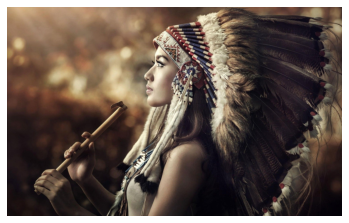

In [7]:
img2 = cv2.imread('../input/red-indian/red_indian2.jpg')

plt.imshow(img2[:,:,::-1])
plt.axis('off')

In [3]:
# func to apply transformation and visualize the result
def perform_Transformation(image, M):
    """
    Takes in input image and the transformation matrix 
    Appl
    """
    rows,cols,ch = image.shape

    dst = cv2.warpAffine(image,M,(cols,rows))
    
    
    plt.figure(figsize = (24,8))
    plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.axis('off'); plt.title('Original Image')
    
    plt.subplot(122); plt.imshow(dst[:,:,::-1]); plt.axis('off'); plt.title("Transformed Image")

## Translation

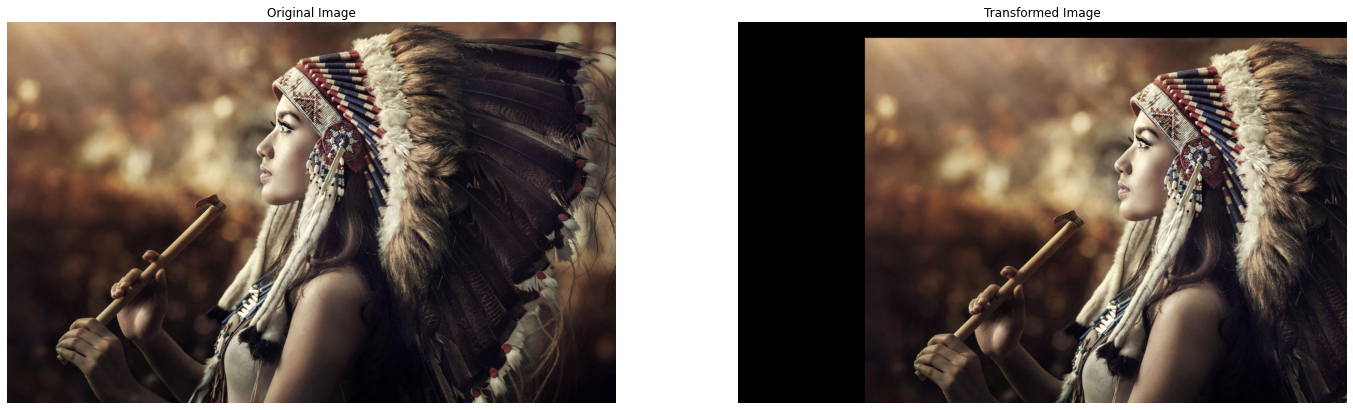

In [14]:
M = np.float32([[1,0,400],
                [0,1,50]])

#tranlates the image to 400 pixels in x direction and 50 pixels in y direction

perform_Transformation(img2, M)


## Scaling 

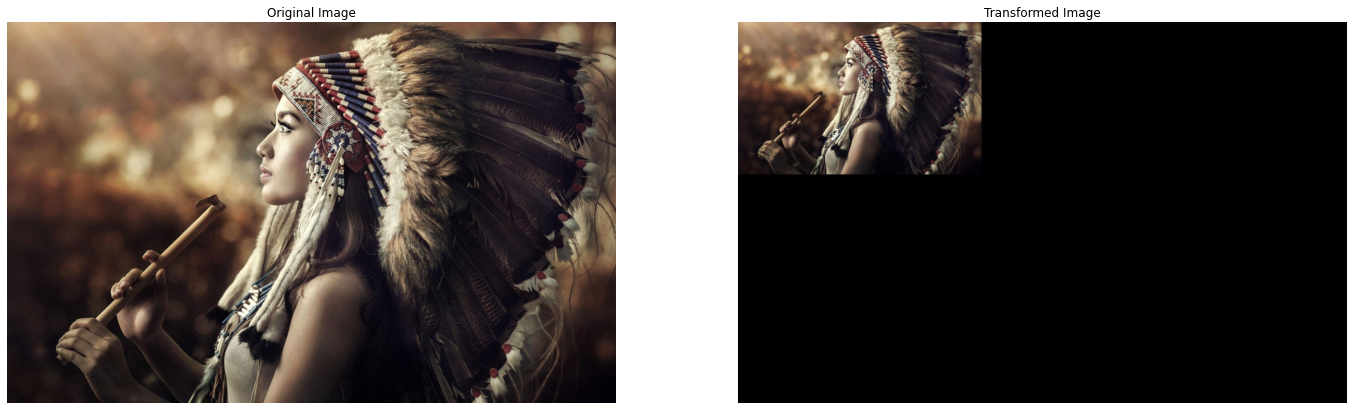

In [10]:
M = np.float32([[0.4,0,0],
                [0,0.4,0]])

# scale image down by a factor of 0.4 in both directions 
perform_Transformation(img2, M)

## Rotation

![](https://latex.codecogs.com/svg.image?A&space;=&space;\begin{bmatrix}&space;\cos(\theta&space;)&space;&&space;-sin(\theta&space;)&space;&space;&&space;0\\&space;&space;sin(\theta&space;)&&space;cos(\theta&space;)&space;&&space;0&\\&space;&space;0&&space;0&space;&&space;1&\end{bmatrix})

In [20]:
center = (img2.shape[1]//2, img2.shape[0]//2)
angle = -90
scale = 0

In [21]:
# rotate the image by 50 anti clockwise and scale the result by 0.6
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )


In [22]:
rot_mat

array([[  0.,  -0., 960.],
       [  0.,   0., 600.]])

In [ ]:
perform_Transformation(img2, rot_mat)

## Sheer (vertical)

In [ ]:
M = np.float32([[1,0.4,0],
                [0,1,0]])

perform_Transformation(img2, M)

## Sheer (horizontal)

In [ ]:
M = np.float32([[1,0,0],
                [0.2,1,0]])

perform_Transformation(img2, M)

## Sheer (both added)

In [ ]:
M = np.float32([[1,0.4,0],
                [0.2,1,0]])

perform_Transformation(img2, M)